> **Jupyter slideshow:** This notebook can be displayed as slides. To view it as a slideshow in your browser, run the following cell:

> `> jupyter nbconvert [this_notebook.ipynb] --to slides --post serve`
 
> To toggle off the slideshow cell formatting, click the `CellToolbar` button, then `View > Cell Toolbar > None`.

<img src="./images/salesforce.svg" width="50" height="50" align="right"/>

<img src="./images/di.png" width="50" height="50" align="right"/>

#  K-Nearest Neighbors 

<img src="./images/knn.png" width="450" height="450" align="center"/>

<a id="learning-objectives"></a>
## Learning Objectives

1. Utilize the KNN model on the iris data set.
2. Implement scikit-learn's KNN model.
3. Assess the fit of a KNN Model using scikit-learn.

In this lesson, we will get an intuitive and practical feel for the **k-Nearest Neighbors** model. kNN is a **non-parametric model**. So, the model is not represented as an equation with parameters (e.g. the $\beta$ values in linear regression).

First, we will make a model by hand to classify iris flower data. Next, we will automatedly make a model using kNN.

> You may have heard of the clustering algorithm **k-Means Clustering**. These techniques have nothing in common, aside from both having a parameter k!

<img src="./images/iris.jpeg" width="450" height="450" align="center"/>

<a id="overview-of-the-iris-dataset"></a>
## Loading the Iris Data Set
---

#### Read the iris data into a pandas DataFrame, including column names.

In [1]:
# Read the iris data into a DataFrame.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Display plots in-notebook
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

data = 'data/iris.data'
iris = pd.read_csv(data)

In [2]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [3]:
iris[iris['species']=='Iris-versicolor']

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor


<a id="terminology"></a>
### Terminology

- **150 observations** (n=150): Each observation is one iris flower.
- **Four features** (p=4): sepal length, sepal width, petal length, and petal width.
- **Response**: One of three possible iris species (setosa, versicolor, or virginica)
- **Classification problem** because response is categorical.

In [4]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


<a id="exercise-human-learning-with-iris-data"></a>
## Guided Practice: "Human Learning" With Iris Data

**Question:** Can we predict the species of an iris using petal and sepal measurements? Together, we will:

1. Read the iris data into a Pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use sorting, split-apply-combine, and/or visualization to look for differences between species.
4. Write down a set of rules that could be used to predict species based on iris measurements.

**BONUS:** Define a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data and check the accuracy of your predictions.

#### Gather some basic information about the data.

In [5]:
# 150 observations, 5 columns (the 4 features & response)
iris.shape

(150, 5)

In [6]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
# Verify the basic stats look appropriate
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Test for imbalanced classes
iris.species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

In [9]:
# Verify we are not missing any data
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Use sorting, split-apply-combine, and/or visualization to look for differences between species.

In [10]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# Sort the DataFrame by petal_width.
iris.sort_values(by='petal_width', ascending=True, inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.2,4.1,1.5,0.1,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa


In [12]:
# Sort the DataFrame by petal_width and display the NumPy array.
iris.sort_values(by='petal_width', ascending=True).values[0:5]

array([[5.2, 4.1, 1.5, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa']], dtype=object)

#### Split-apply-combine: Explore the data while using a `groupby` on `'species'`.

In [13]:
# Mean of sepal_length, grouped by species.
iris.groupby(by='species', axis=0).sepal_length.mean()

species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepal_length, dtype: float64

In [14]:
# Mean of all numeric columns, grouped by species.
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [15]:
# describe() of all numeric columns, grouped by species.
iris.groupby('species').describe()

sepal_length                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width         ... petal_length      petal_width         \
                      count   mean  ...          75%  max       count   mean   
species                             ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
species                                             
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

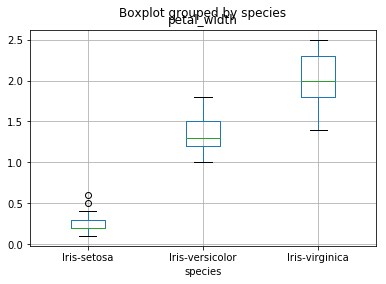

In [16]:
# Box plot of petal_width, grouped by species.
iris.boxplot(column='petal_width', by='species');

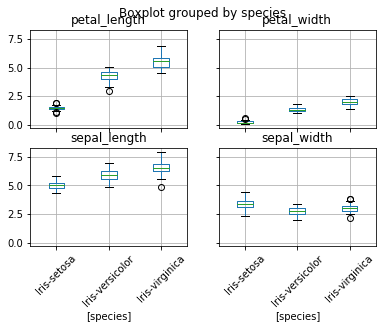

In [17]:
# Box plot of all numeric columns, grouped by species.
iris.boxplot(by='species', rot=45);

In [18]:
# Map species to a numeric value so that plots can be colored by species.
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# Alternative method:
iris['species_num'] = iris.species.factorize()[0]

In [19]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
32,5.2,4.1,1.5,0.1,Iris-setosa,0
13,4.3,3.0,1.1,0.1,Iris-setosa,0
37,4.9,3.1,1.5,0.1,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0
12,4.8,3.0,1.4,0.1,Iris-setosa,0
34,4.9,3.1,1.5,0.1,Iris-setosa,0
0,5.1,3.5,1.4,0.2,Iris-setosa,0
27,5.2,3.5,1.5,0.2,Iris-setosa,0
28,5.2,3.4,1.4,0.2,Iris-setosa,0
29,4.7,3.2,1.6,0.2,Iris-setosa,0


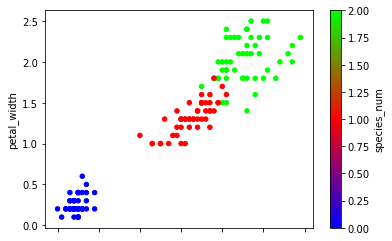

In [20]:
# Scatterplot of petal_length vs. petal_width, colored by species
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg');

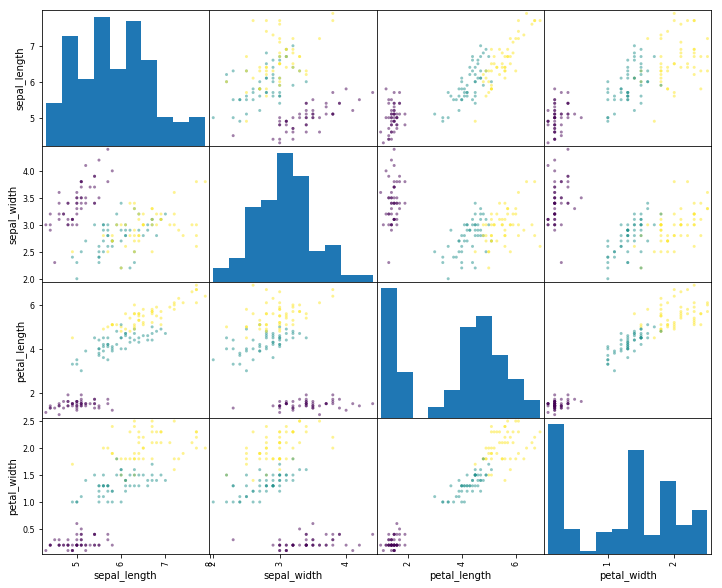

In [21]:
# Scatter matrix of all features, colored by species.
pd.plotting.scatter_matrix(iris.drop('species_num', axis=1), c=iris.species_num, figsize=(12, 10));

#### Class Exercise: Using the graphs above, can you write down a set of rules that can accurately predict species based on iris measurements?

In [22]:
# Feel free to do more analysis if needed to make good rules!

In [23]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
32,5.2,4.1,1.5,0.1,Iris-setosa,0
13,4.3,3.0,1.1,0.1,Iris-setosa,0
37,4.9,3.1,1.5,0.1,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0
12,4.8,3.0,1.4,0.1,Iris-setosa,0


In [24]:
iris['prediction2']=-5
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,prediction2
32,5.2,4.1,1.5,0.1,Iris-setosa,0,-5
13,4.3,3.0,1.1,0.1,Iris-setosa,0,-5


#### Bonus: Try to implement these rules to make your own classifier!

Write a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data and check the accuracy of your predictions.

In [25]:
def predict_flower(df):
    preds = 'Iris-setosa'   # temporary!
    df['prediction']=-1
    for index,row in df.iterrows():
        if row.petal_width <1:
            df['prediction'][index]='Iris-setosa'
        else:
            df['prediction'][index]='Iris-virginica'

    # add a column to the DataFrame with the predictions
    
    
predict_flower(iris)

In [26]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,prediction2,prediction
32,5.2,4.1,1.5,0.1,Iris-setosa,0,-5,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa,0,-5,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa,0,-5,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa,0,-5,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa,0,-5,Iris-setosa


In [27]:
# Let's see what percentage your manual classifier gets correct!
# 0.3333 means 1/3 are classified correctly

sum(iris.species == iris.prediction) / 150.

0.6666666666666666

<a id="human-learning-on-the-iris-dataset"></a>
## Human Learning on the Iris Data Set
---

How did we (as humans) predict the species of an iris?

1. We observed that the different species had (somewhat) dissimilar measurements.
2. We focused on features that seemed to correlate with the response.
3. We created a set of rules (using those features) to predict the species of an unknown iris.

We assumed that if an **unknown iris** had measurements similar to **previous irises**, then its species was most likely the same as those previous irises.

In [28]:
# Allow plots to appear in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

# Create a custom color map.
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [29]:
# Map each iris species to a number.
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

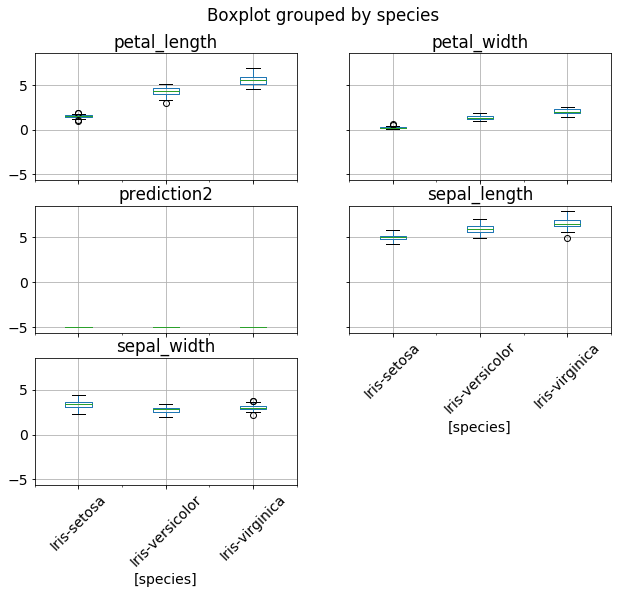

In [30]:
# Box plot of all numeric columns, grouped by species.
iris.drop('species_num', axis=1).boxplot(by='species', rot=45);

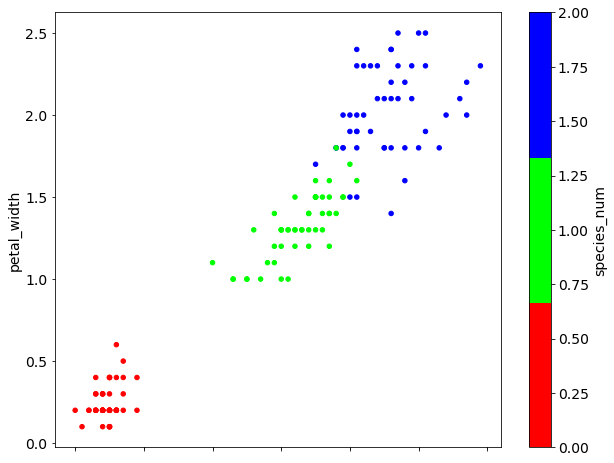

In [31]:
# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES.
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cmap_bold);

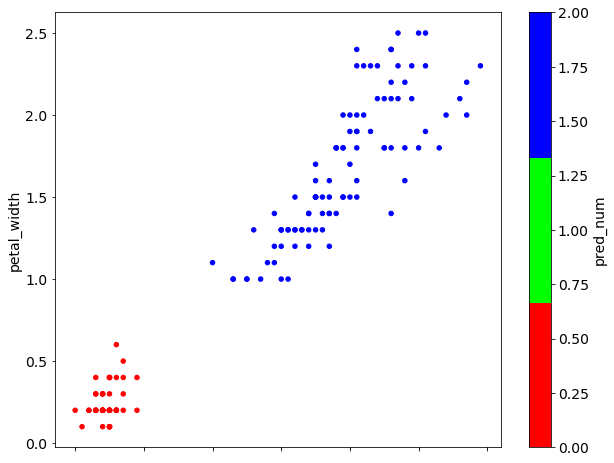

In [32]:
iris['pred_num'] = iris.prediction.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})



# Create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by PREDICTION.
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='pred_num', colormap=cmap_bold);

---

<a id="k-nearest-neighbors-knn-classification"></a>
## K-Nearest Neighbors (KNN) Classification
---

K-nearest neighbors classification is (as its name implies) a classification model that uses the "K" most similar observations in order to make a prediction.

KNN is a supervised learning method; therefore, the training data must have known target values.

The process of of prediction using KNN is fairly straightforward:

1. Pick a value for K.
2. Search for the K observations in the data that are "nearest" to the measurements of the unknown iris.
    - Euclidian distance is often used as the distance metric, but other metrics are allowed.
3. Use the most popular response value from the K "nearest neighbors" as the predicted response value for the unknown iris.

The visualizations below show how a given area can change in its prediction as K changes.

- Colored points represent true values and colored areas represent a **prediction space**. (This is called a Voronoi Diagram.)
- Each prediction space is wgere the majority of the "K" nearest points are the color of the space.
- To predict the class of a new point, we guess the class corresponding to the color of the space it lies in.

<a id="knn-classification-map-for-iris-k"></a>
### KNN Classification Map for Iris (K=1)

![1NN classification map](./images/iris_01nn_map.png)

### KNN Classification Map for Iris (K=5)

![5NN classification map](./images/iris_05nn_map.png)

### KNN Classification Map for Iris (K=15)

![15NN classification map](./images/iris_15nn_map.png)

<a id="knn-classification-map-for-iris-k"></a>
### KNN Classification Map for Iris (K=50)

![50NN classification map](./images/iris_50nn_map.png)

We can see that, as K increases, the classification spaces' borders become more distinct. However, you can also see that the spaces are not perfectly pure when it comes to the known elements within them.

**How are outliers affected by K?** As K increases, outliers are "smoothed out". Look at the above three plots and notice how outliers strongly affect the prediction space when K=1. When K=50, outliers no longer affect region boundaries. This is a classic bias-variance tradeoff -- with increasing K, the bias increases but the variance decreases.

**Question:** What's the "best" value for K in this case?

**Answer:** ...

In [70]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,prediction2,prediction,pred_num
32,5.2,4.1,1.5,0.1,Iris-setosa,0,-5,Iris-setosa,0
13,4.3,3.0,1.1,0.1,Iris-setosa,0,-5,Iris-setosa,0
37,4.9,3.1,1.5,0.1,Iris-setosa,0,-5,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0,-5,Iris-setosa,0
12,4.8,3.0,1.4,0.1,Iris-setosa,0,-5,Iris-setosa,0


In [72]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'species_num', 'prediction2', 'prediction', 'pred_num'],
      dtype='object')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba[feature_cols]
y = nba.pos_num

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

## Guided Intro to KNN: NBA Position KNN Classifier

For the rest of the lesson, we will be using a dataset containing the 2015 season statistics for ~500 NBA players. This dataset leads to a nice choice of K, as we'll see below. The columns we'll use for features (and the target 'pos') are:


| Column | Meaning |
| ---    | ---     |
| pos | C: Center. F: Front. G: Guard |
| ast | Assists per game | 
| stl | Steals per game | 
| blk | Blocks per game |
| tov | Turnovers per game | 
| pf  | Personal fouls per game | 

For information about the other columns, see [this glossary](https://www.basketball-reference.com/about/glossary.html).

<img src="./images/basketball.png" width="450" height="450" align="center"/>

In [33]:
# Read the NBA data into a DataFrame.
import pandas as pd

path = 'data/NBA_players_2015.csv'
nba = pd.read_csv(path, index_col=0)

In [34]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg_,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
season_end,,,,,,,,,,,,,,,,,,,,,
2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,4.6,0.469,...,15.1,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3
2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,2.1,0.474,...,15.9,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0
2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,5.5,0.550,...,19.2,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6
2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,2.6,0.432,...,12.9,14.1,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0
2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,11.8,0.426,...,10.9,19.6,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2


In [35]:
# Map positions to numbers
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

In [36]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg_,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,pos_num
season_end,,,,,,,,,,,,,,,,,,,,,
2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,4.6,0.469,...,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3,1
2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,2.1,0.474,...,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0,2
2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,5.5,0.550,...,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6,0
2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,2.6,0.432,...,14.1,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0,1
2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,11.8,0.426,...,19.6,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2,2


In [37]:
# Create feature matrix (X).
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba[feature_cols]

In [38]:
X.head()

,ast,stl,blk,tov,pf
season_end,,,,,
2015,1.0,0.4,0.3,0.9,2.2
2015,0.4,0.4,0.3,0.4,0.8
2015,1.0,0.4,1.2,1.6,3.0
2015,0.9,0.2,0.5,0.5,1.8
2015,1.9,0.6,0.1,1.6,2.1


In [39]:
# Create response vector (y).
y = nba.pos_num
y

season_end
2015    1
2015    2
2015    0
2015    1
2015    2
2015    0
2015    1
2015    0
2015    1
2015    1
2015    2
2015    1
2015    1
2015    0
2015    2
2015    1
2015    1
2015    2
2015    1
2015    0
2015    1
2015    1
2015    1
2015    0
2015    2
2015    1
2015    1
2015    1
2015    2
2015    2
       ..
2015    2
2015    1
2015    1
2015    2
2015    1
2015    1
2015    1
2015    2
2015    0
2015    1
2015    2
2015    2
2015    2
2015    1
2015    2
2015    2
2015    1
2015    2
2015    1
2015    1
2015    0
2015    2
2015    1
2015    1
2015    2
2015    2
2015    2
2015    1
2015    0
2015    0
Name: pos_num, Length: 478, dtype: int64

<a id="using-the-traintest-split-procedure-k"></a>
### Using the Train/Test Split Procedure (K=1)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Step 1: Split X and y into training and testing sets (using `random_state` for reproducibility).

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [42]:
y.shape

(478,)

In [43]:
y_train.shape

(358,)

In [44]:
y_test.shape

(120,)

#### Step 2: Train the model on the training set (using K=1).

In [45]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

#### Step 3: Test the model on the testing set and check the accuracy.

In [46]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.6166666666666667


**Question:** If we had trained on the entire dataset and tested on the entire dataset, using 1-KNN what accuracy would we likely get? If the resulting accuracy is not this number, what must some data points look like?

**Answer:** ...

#### Repeating for K=50.

In [47]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.675


#### Comparing Testing Accuracy With Null Accuracy

Null accuracy is the accuracy that can be achieved by **always predicting the most frequent class**. For example, if most players are Centers, we would always predict Center.

The null accuracy is a benchmark against which you may want to measure every classification model.

#### Examine the class distribution from the training set.

Remember that we are comparing KNN to this simpler model. So, we must find the most frequent class **of the training set**.

In [48]:
most_freq_class = y_train.value_counts().index[0]

print(y_train.value_counts())
most_freq_class

1    150
2    140
0     68
Name: pos_num, dtype: int64


1

#### Compute null accuracy.

In [49]:
y_test.value_counts()[most_freq_class] / len(y_test)

0.4083333333333333

<a id="tuning-a-knn-model"></a>
## Tuning a KNN Model
---

In [50]:
# Instantiate the model (using the value K=5).
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model with data.
knn.fit(X, y)

# Store the predicted response values.
y_pred_class = knn.predict(X)

In [51]:
# Calculate predicted probabilities of class membership.
# Each row sums to one and contains the probabilities of the point being a 0-Center, 1-Front, 2-Guard.
knn.predict_proba(X)

array([[0. , 0.6, 0.4],
       [0. , 0.8, 0.2],
       [0.8, 0.2, 0. ],
       ...,
       [0. , 0.6, 0.4],
       [0.6, 0.4, 0. ],
       [0.6, 0.4, 0. ]])

<a id="what-happen-if-we-view-the-accuracy-of-our-training-data"></a>
### What Happens If We View the Accuracy of our Training Data?

In [52]:
scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])

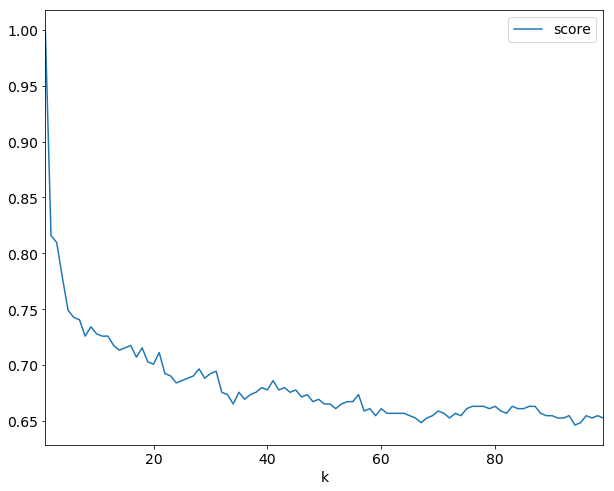

In [53]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

**Question:** As K increases, why does the accuracy fall?

**Answer:** ...

#### Search for the "best" value of K.

In [54]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.

k_range = list(range(1, 101))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [55]:
# Allow plots to appear in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [56]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df.head()

,training error,testing error
K,,
100,0.382845,0.366667
99,0.378661,0.358333
98,0.384937,0.366667
97,0.384937,0.366667
96,0.380753,0.366667


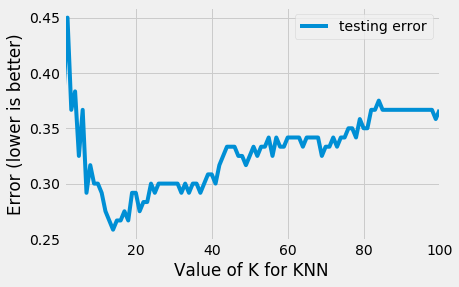

In [57]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [58]:
# Find the minimum testing error and the associated K value.
df.sort_values('testing error').head()

,training error,testing error
K,,
14,0.299163,0.258333
13,0.307531,0.266667
18,0.307531,0.266667
16,0.299163,0.266667
15,0.309623,0.266667


In [59]:
# Alternative method:
min(list(zip(testing_error, k_range)))

(0.2583333333333333, 14)

<a id="training-error-versus-testing-error"></a>
### Training Error Versus Testing Error

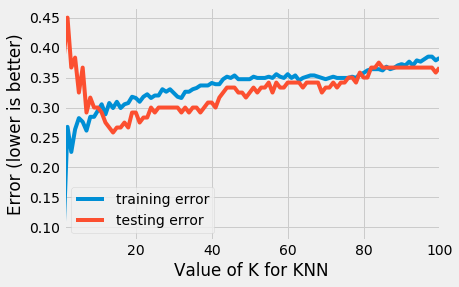

In [60]:
# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

- **Training error** decreases as model complexity increases (lower value of K).
- **Testing error** is minimized at the optimum model complexity.

Evaluating the training and testing error is important. For example:

- If the training error is much lower than the test error, then our model is likely overfitting. 
- If the test error starts increasing as we vary a hyperparameter, we may be overfitting.
- If either error plateaus, our model is likely underfitting (not complex enough).

#### Making Predictions on Out-of-Sample Data

Given the statistics of a (truly) unknown NBA player, how do we predict his position?

In [61]:
import numpy as np

# Instantiate the model with the best-known parameters.
knn = KNeighborsClassifier(n_neighbors=14)

# Re-train the model with X and y (not X_train and y_train). Why?
knn.fit(X, y)

# Make a prediction for an out-of-sample observation.
knn.predict(np.array([2, 1, 0, 1, 2]).reshape(1, -1))

array([2])

What could we conclude?

- When using KNN on this data set with these features, the **best value for K** is likely to be around 14.
- Given the statistics of an **unknown player**, we estimate that we would be able to correctly predict his position about 74% of the time.

<a id="standardizing-features"></a>
## Standardizing Features
---

There is one major issue that applies to many machine learning models: They are sensitive to feature scale. 

> KNN in particular is sensitive to feature scale because it (by default) uses the Euclidean distance metric. To determine closeness, Euclidean distance sums the square difference along each axis. So, if one axis has large differences and another has small differences, the former axis will contribute much more to the distance than the latter axis.

This means that it matters whether our feature are centered around zero and have similar variance to each other.

Unfortunately, most data does not naturally start at a mean of zero and a shared variance. Other models tend to struggle with scale as well, even linear regression, when you get into more advanced methods such as regularization.

Fortuantely, this is an easy fix.

<a id="use-standardscaler-to-standardize-our-data"></a>
### Use `StandardScaler` to Standardize our Data

StandardScaler standardizes our data by subtracting the mean from each feature and dividing by its standard deviation.

#### Separate feature matrix and response for scikit-learn.

In [62]:
# Create feature matrix (X).
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']

X = nba[feature_cols]
y = nba.pos_num  # Create response vector (y).

#### Create the train/test split.

Notice that we create the train/test split first. This is because we will reveal information about our testing data if we standardize right away.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

#### Instantiate and fit `StandardScaler`.

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# We fit to figure out the distribution
scaler.fit(X_train)
# now we transform everything using that
# if you wanted to do it all in one step ==> X_train = scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Fit a KNN model and look at the testing error.
Can you find a number of neighbors that improves our results from before?

In [65]:
# Calculate testing error.
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
print('the accuracy is: ',testing_accuracy)
testing_error = 1 - testing_accuracy

print('the error is: ',testing_error)

the accuracy is:  0.6916666666666667
the error is:  0.30833333333333335


<a id="comparing-knn-with-other-models"></a>
## Comparing KNN With Other Models
---

**Advantages of KNN:**

- It's simple to understand and explain.
- Model training is fast.
- It can be used for classification and regression (for regression, take the average value of the K nearest points!).
- Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.

**Disadvantages of KNN:**

- It must store all of the training data.
- Its prediction phase can be slow when n is large.
- It is sensitive to irrelevant features.
- It is sensitive to the scale of the data.
- Accuracy is (generally) not competitive with the best supervised learning methods.

# Random Forest 
----

<img src="./images/rf.jpg" width="550" height="550" align="center"/>

In [66]:
## Lets import RF
from sklearn.ensemble import RandomForestClassifier

In [67]:
# Calculate testing error.
rf_model = RandomForestClassifier(n_estimators=60,max_depth=5, random_state=0)


rf_model.fit(X_train, y_train)

y_pred_class = rf_model.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
print('the accuracy is: ',testing_accuracy)
testing_error = 1 - testing_accuracy

print('the error is: ',testing_error)

the accuracy is:  0.7333333333333333
the error is:  0.2666666666666667


# Now you do it 
<img src="./images/hands_on.jpg" width="100" height="100" align="right"/>

The dataset is one on "churn" in cell phone plans. It has information on the usage of the phones by different account holders and whether or not they churned or not.

Our goal is to predict whether a user will churn or not based on the other features.

<img src="./images/churn.png" width="600" height="600" align="center"/>

In [68]:
churn = pd.read_csv('./data/churn_missing.csv')
churn.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,KS,128,415,no,yes,25.0,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26.0,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0.0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0.0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0.0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


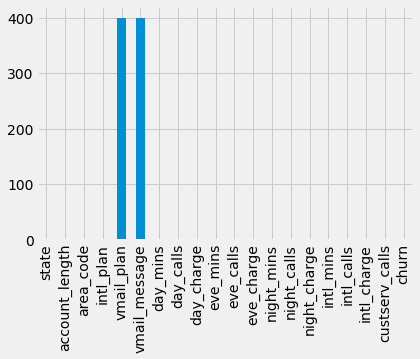

In [69]:
churn.isnull().sum().plot(kind='bar')